# Model Implementation

In [1]:
import numpy as np
import pandas as pd

In [2]:
class KNN:

    def __init__(self, k = 3,metric = 'euclidean'):
        self.k = k
        self.metric = metric

    def distance(self,x1,x2,metric):

        if (metric == 'euclidean'):
            return np.sqrt(np.sum((x1-x2)**2))

        elif (metric == 'manhattan'):
            return np.sum(np.abs(x1-x2))

        elif (metric == 'minkowski'):
            return (np.sum((np.abs(x1-x2))**self.k)) ** (1/self.k)

        return ValueError("Invalid Distance Metric")
        

    def fit(self,X,y):
        self.X = X
        self.y = y

    def predict(self,X):
        predictions = [self.predict_helper(x) for x in X]
        return np.array(predictions)

    def predict_helper(self,x):
        distance_vector = [self.distance(x,x_,self.metric) for x_ in self.X]
        k_indices = np.argsort(distance_vector)[:self.k]
        k_labels = [self.y[i] for i in k_indices]

        most_voted = np.bincount(k_labels).argmax()
        return most_voted

    


# Model Testing

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [15]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [16]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Implemented Model
model = KNN(k=3, metric='euclidean')
model.fit(X_train, y_train)

In [29]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test,y_pred):.2f}")

Accuracy: 0.81


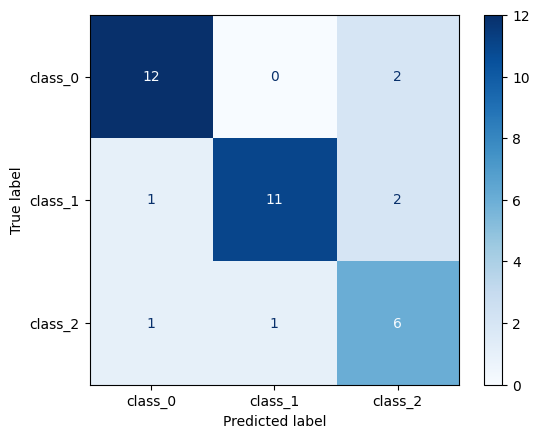

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.show()


# Model Analysis

## k vs Accuracy Curve

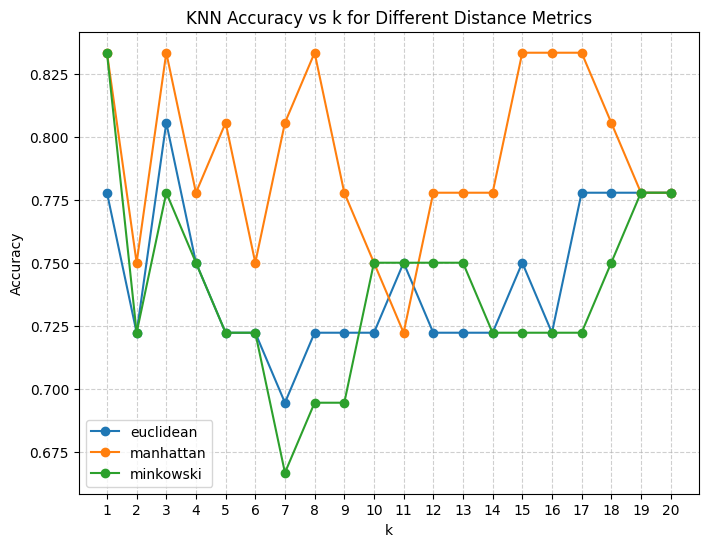

In [ ]:
k_values = range(1, 21)
metrics = ['euclidean', 'manhattan', 'minkowski']

plt.figure(figsize=(8, 6))

for metric in metrics:
    accuracies = []
    for k in k_values:
        knn = KNN(k=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    plt.plot(k_values, accuracies, marker='o', label=metric)

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k for Different Distance Metrics')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()
